# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Check in your data file along with this exercise. Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [61]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns


 df_cannabis=pd.read_csv('/content/Marijuana_Arrests.csv')
 print(df_cannabis.head())
 print(df_cannabis.shape)

                                   TYPE ADULT_JUVENILE  YEAR  \
0                            Possession          Adult  2012   
1                            Possession          Adult  2012   
2                            Possession          Adult  2012   
3                            Possession          Adult  2012   
4  Possession with intent to distribute          Adult  2012   

                 DATETIME                              CCN   AGE  \
0  2012/01/01 06:00:00+00                 b';\xc8k~\xa4iJ'  20.0   
1  2012/01/01 06:00:00+00                 b';\xc8k~\xa4iJ'  23.0   
2  2012/01/01 06:00:00+00           b't6\xa0\xac\xec`\xa4'  46.0   
3  2012/01/01 09:35:00+00        b'\xbe\x1d\xa7\xf5\xffWx'  30.0   
4  2012/01/02 19:40:00+00  b'\xbb\xc0\x8e\x94\x81\xac\xcd'  29.0   

  OFFENSE_DISTRICT  OFFENSE_PSA  OFFENSE_BLOCKX  OFFENSE_BLOCKY  ...  \
0               5D        501.0        399700.0        137900.0  ...   
1               5D        501.0        399700.0        137900.

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [62]:
# Get the number of unique values for each column
unique_counts = df_cannabis.nunique()

# Display the counts of each column
unique_counts

# List of columns to exclude (unique identifiers)
unique_identifier_columns = ['CCN', 'GIS_ID', 'OBJECTID', 'GLOBALID']

#Exclude unique identifiers
col_check = []
for col in df_cannabis.columns:
  if col not in unique_identifier_columns:
    col_check.append(col)

# Check column with the max number of unique values
most_diverse_column = unique_counts[col_check].idxmax()
max_unique_values = unique_counts[most_diverse_column]
print(most_diverse_column, max_unique_values)


DATETIME 12053


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [63]:
# Finding columns where all values are the same
redundant_columns = []
for col in df_cannabis.columns:
    if df_cannabis[col].nunique() == 1:
        redundant_columns.append(col)

if redundant_columns:
    print("Columns with the same value in every row:")
    for col in redundant_columns:
       print(f" {col}: {df_cannabis[col].iloc[0]}")
else:
    print("No redundant columns found.")

Columns with the same value in every row:
 CATEGORY: Narcotics
 CREATOR: JLAY
 EDITOR: JLAY
 EDITED: 2024/05/30 22:47:09+00


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

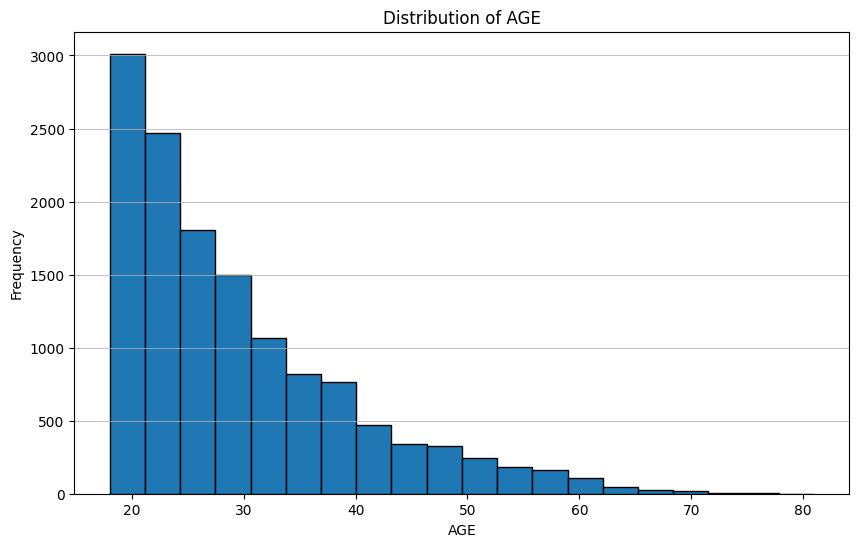

In [64]:
# Selecting AGE as numerical column
numeric_col = 'AGE'

# Drop missing values
data_numeric = df_cannabis[numeric_col].dropna()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(data_numeric, bins=20, edgecolor='black')
plt.title(f'Distribution of {numeric_col}')
plt.xlabel(numeric_col)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

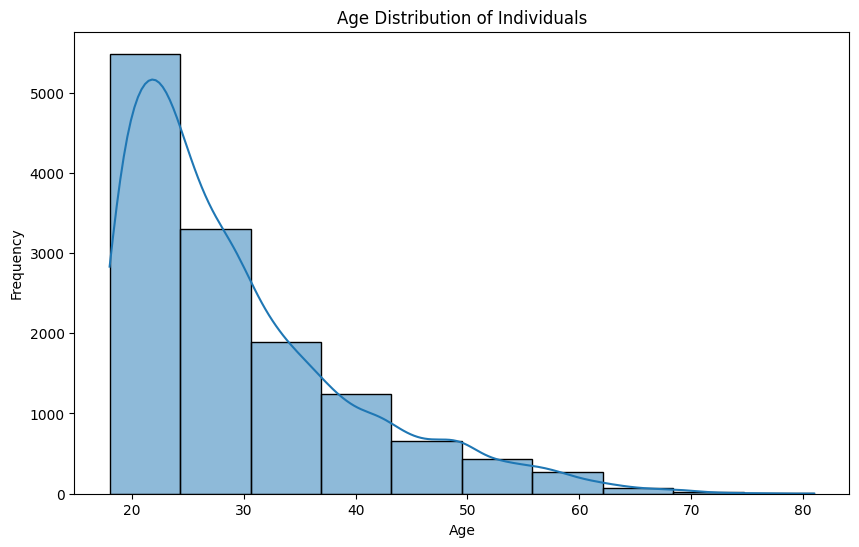

In [65]:
# Convert AGE to numeric
df_cannabis['AGE'] = pd.to_numeric(df_cannabis['AGE'], errors='coerce')

# Drop rows with missing AGE values
age_data = df_cannabis['AGE'].dropna()

# Plot the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(age_data, bins=10, kde=True)
plt.title('Age Distribution of Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

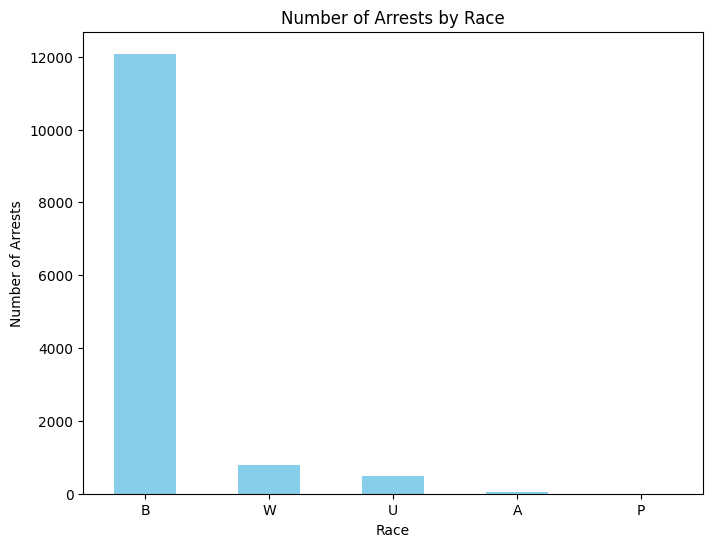

In [66]:
# Clean up the RACE column
df_cannabis['RACE'] = df_cannabis['RACE'].str.strip()

# Count arrests by race
race_counts = df_cannabis['RACE'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
race_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Arrests by Race')
plt.xlabel('Race')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=0)
plt.show()


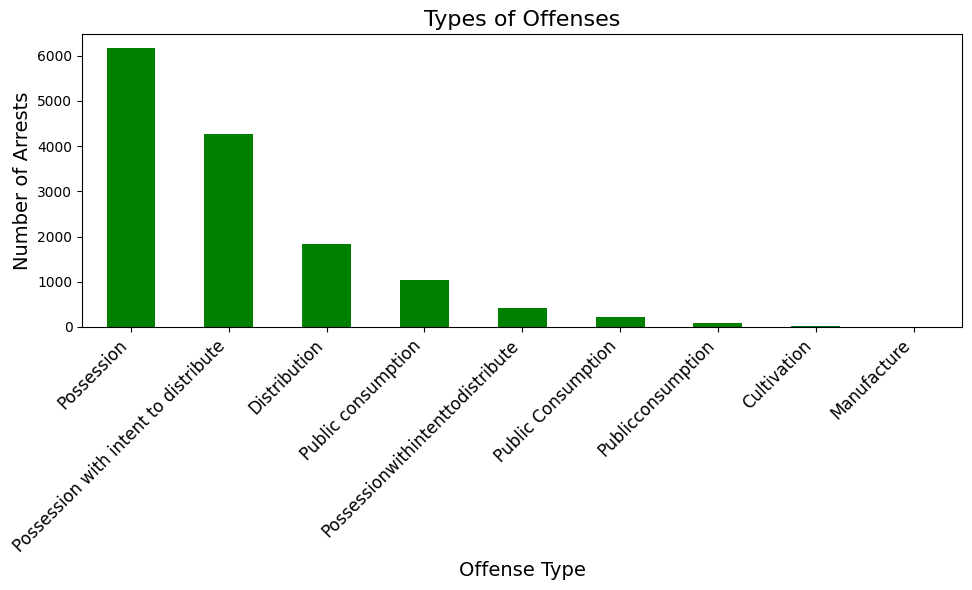

In [67]:
# Counting the types of offenses
offense_counts = df_cannabis['TYPE'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
offense_counts.plot(kind='bar', color='green')

plt.title('Types of Offenses', fontsize=16)
plt.xlabel('Offense Type', fontsize=14)
plt.ylabel('Number of Arrests', fontsize=14)

# Adjusting x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


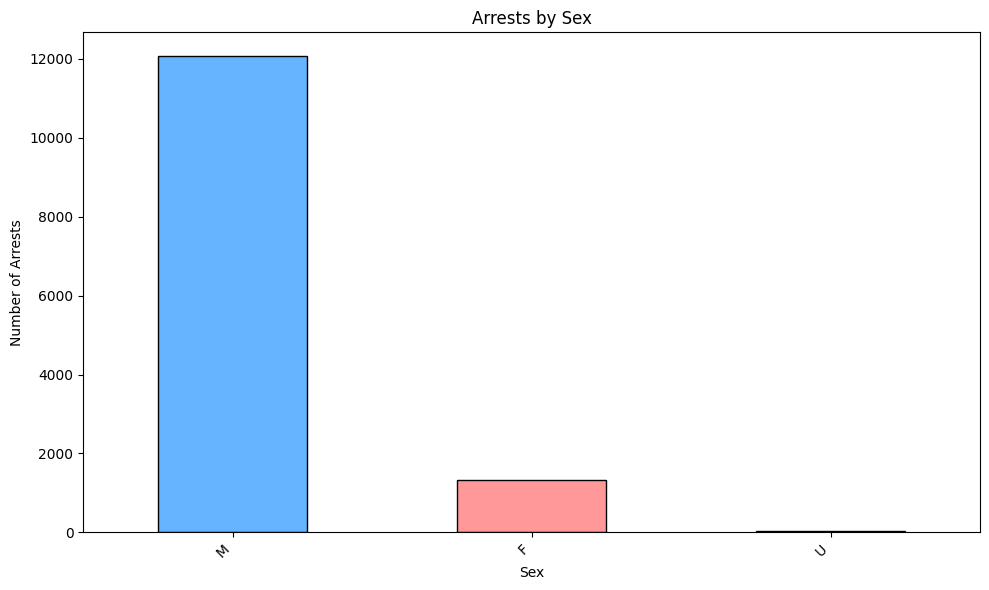

In [68]:
# Cleaning up the 'SEX' column
df_cannabis['SEX'] = df_cannabis['SEX'].str.strip()

# Count the arrests by sex
sex_counts = df_cannabis['SEX'].value_counts()

# Creating a figure with appropriate size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
sex_counts.plot(
    kind='bar',
    color=['#66b3ff', '#ff9999', '#c2c2c2', '#999999'],
    edgecolor='black',
    linewidth=1,
    ax=ax
)

# Add labels and title
ax.set_xlabel('Sex')
ax.set_ylabel('Number of Arrests')
ax.set_title('Arrests by Sex')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the spacing
plt.tight_layout()

# Display the plot
plt.show()

Then comment on at least two other people's observations that they share on Slack. (Use the reply as thread option in Slack to keep the conversation organized.)

I have commented on posts of
usernames:
1)Venkata Sai Bhavya Saradhi
2)Praveen Thammaneni




---



## Submitting Your Work

Submit your work as usual.